In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/movies.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [10]:
df.describe

<bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy, Drama, Musical     4.7    827     Rahul Rawail   
6            Drama, Romance, War     7.4  1,086   Shoojit Sircar   
8      Horror, Mystery, Thriller     5.6    326    Allyson Patel   
...                          ...     ...    ...              ...   
15493                      Drama     6.1    408      Mozez Singh   
15494  Biography, Drama, History     6.2  1,496    Shyam Benegal   
15503       Action, Crime, Drama     5.8     44  S.P. Muthuraman   
15505              Action, Drama     4.5    655       Kuku Kohli   
15508              Action, Drama     6.2     20     K.C. Bokadia   

               Actor 1                 Actor 2           Actor 3  
1         Rasika Dugal          Vivek Ghamande     Arvind Jangid  
3              Prateik              Ishita Raj   Siddhant Kapoor  
5           Bobby Deol  Aishwarya Rai Bachchan     Shammi Kapoor  
6      Jimmy Sheirgill          Minissha Lamba    Yashpal Sharma  
8            Yash Dave          Muntazir Ahmad      Kiran Bhatia  
...                ...                     ...               ...  
15493    Vicky Kaushal         Sarah Jane Dias  Raaghavv Chanana  
15494   Karisma Kapoor                   Rekha    Manoj Bajpayee  
15503      Chiranjeevi              Jayamalini       Rajinikanth  
15505     Akshay Kumar          Twinkle Khanna       Aruna Irani  
15508       Dharmendra              Jaya Prada       Arjun Sarja  

[5659 rows x 10 columns]>

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
movie_rating = df.groupby(['Name'], as_index=False)['Rating'].sum().sort_values(by='Rating', ascending=False).head(10)
movie_rating

,Name,Rating
588,Baazi,26.5
1884,Guru,25.5
5366,Zindagi,23.1
1296,Devdas,21.7
2079,Hum Dono,20.4
4294,Sanjog,20.1
3014,Maa,19.6
1520,Dushman,19.4
2232,Ittefaq,19.1
389,Anari,18.9


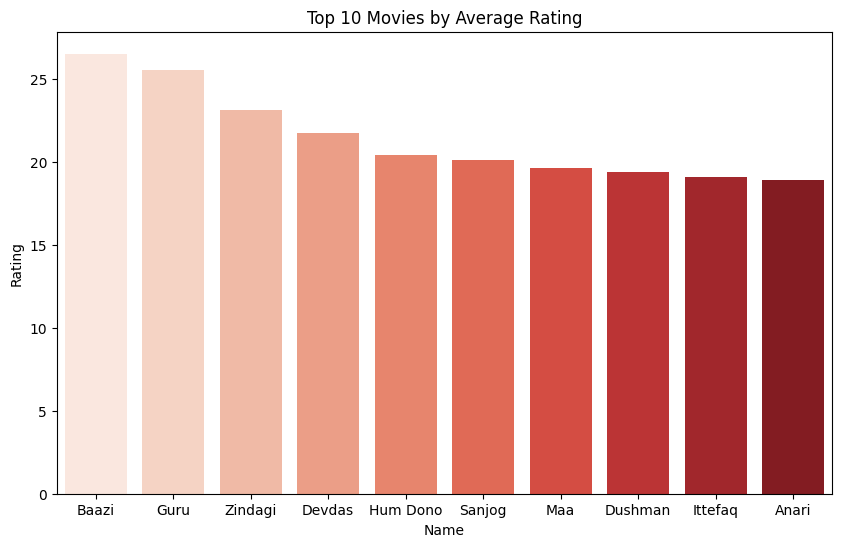

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Rating', data=movie_rating, palette='Reds')
plt.title('Top 10 Movies by Average Rating')
plt.show()

In [14]:
director_rating = df.groupby('Director')['Rating'].mean().sort_values(ascending=False)
top_directors = director_rating.head(10)
top_directors

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64

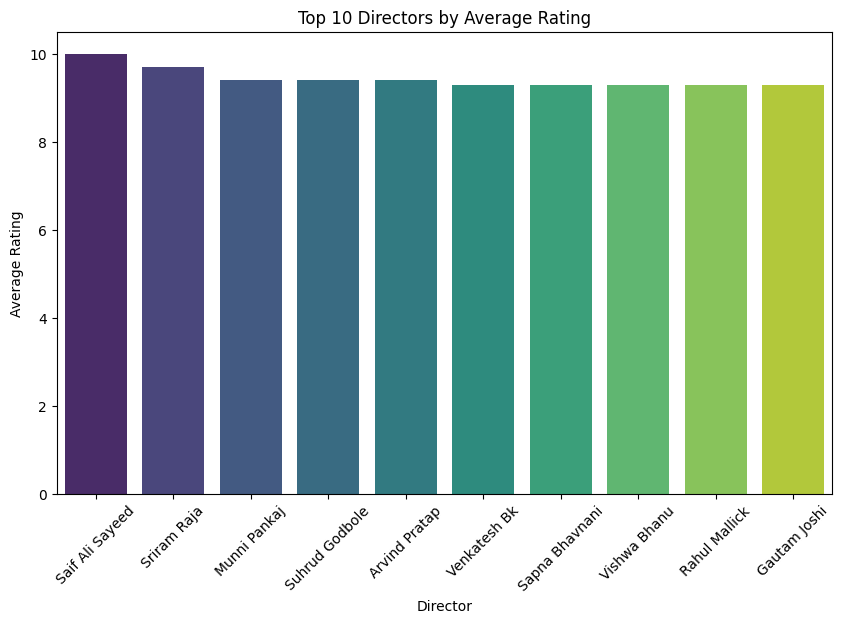

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.show()

In [16]:
df_exploded = df.explode('Actor 1')
actor_counts = df_exploded['Actor 1'].value_counts()
top_actors = actor_counts.head(10)
print(top_actors)


Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
Name: count, dtype: int64


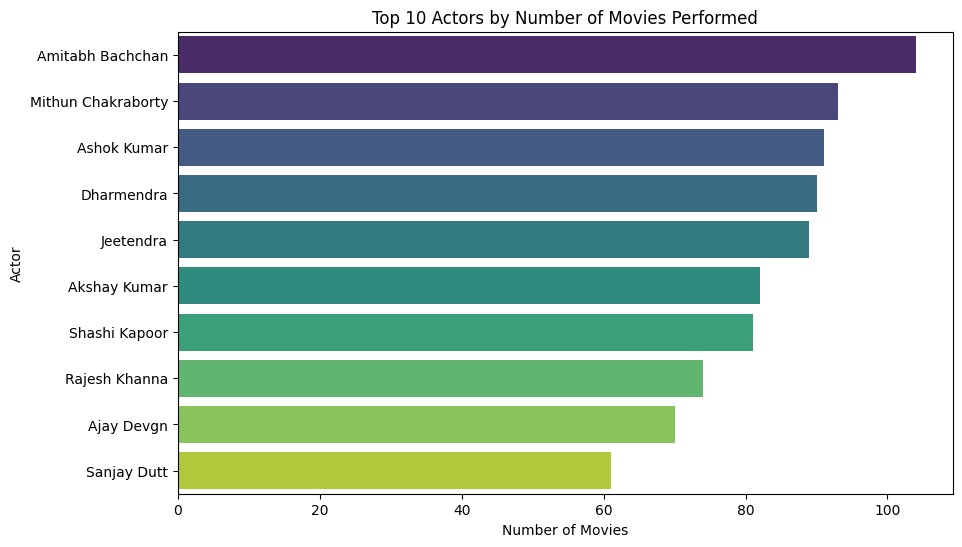

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

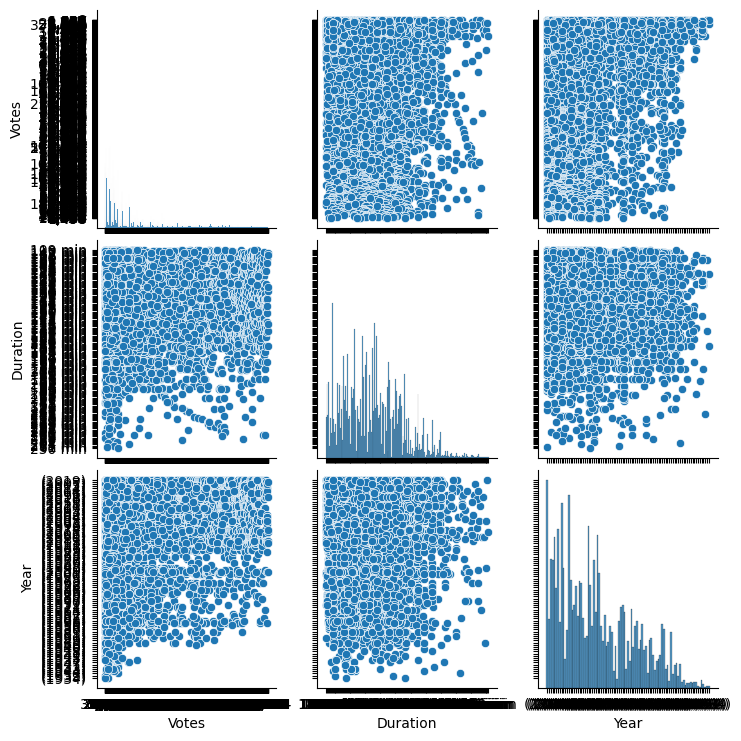

In [18]:
sns.pairplot(df, vars=['Votes', 'Duration', 'Year'])
plt.show()

Model Building

In [19]:
data = df.drop('Name',axis=1)

In [20]:
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [21]:
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

In [22]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

In [23]:
actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [24]:
from sklearn.model_selection import train_test_split
X = data[['Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
from sklearn.linear_model import LinearRegression
md=LinearRegression()
md.fit(X_train,y_train)
y_pred=md.predict(X_test)

In [25]:
y_pred

array([4.79113617, 6.90158541, 6.66835066, ..., 6.02192702, 7.54351365,
       6.61331123])

evaluation of model


In [26]:
from sklearn.metrics import mean_squared_error,  r2_score
meansq = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {meansq}')

Mean Squared Error: 0.3962499291084249


In [27]:
r2 = r2_score(y_test, y_pred)
print(f'r2 Score: {r2}')

r2 Score: 0.795302638404679


In [28]:
X.head()

,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,326,82,5.477778,5.600000,5.600000,5.883333,5.600000


In [29]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

Predictive Rating

In [30]:
data_dict = {'Votes': [1086], 'Duration': [142], 'Genre_mean_rating': [6.82], 'Director_encoded': [7.38], 'Actor1_encoded': [5.43], 'Actor2_encoded': [6.93], 'Actor3_encoded': [6.5]}
df2 = pd.DataFrame(data_dict)

In [31]:
df2

,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,1086,142,6.82,7.38,5.43,6.93,6.5


In [32]:
predicted = md.predict(df2)

In [33]:
print("Predicted Rating:", predicted)

Predicted Rating: [7.00670604]


In [34]:
row_6 = df.iloc[3]
print(row_6)

Name                  ...Yahaan
Year                     (2005)
Duration                142 min
Genre       Drama, Romance, War
Rating                      7.4
Votes                     1,086
Director         Shoojit Sircar
Actor 1         Jimmy Sheirgill
Actor 2          Minissha Lamba
Actor 3          Yashpal Sharma
Name: 6, dtype: object


In [35]:
print("actual rating is ",df.iloc[3]['Rating'])

actual rating is  7.4


In [36]:
print("Predicted Rating is:", predicted)

Predicted Rating is: [7.00670604]


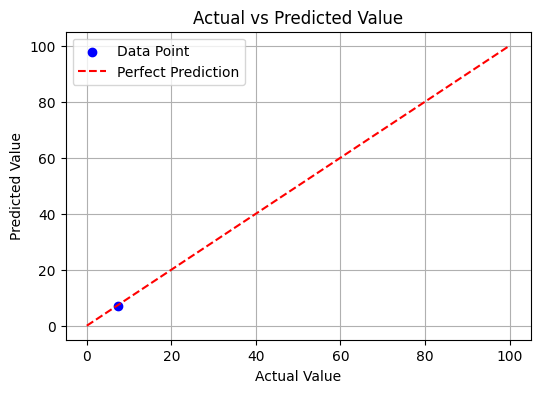

In [37]:
actual_value = df.iloc[3]['Rating']
predicted_value = predicted

plt.figure(figsize=(6, 4))
plt.scatter(actual_value, predicted_value, color='blue', label='Data Point')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()